In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/IRIS.csv?raw=True')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

### Histogram Plot

<Axes: xlabel='species', ylabel='count'>

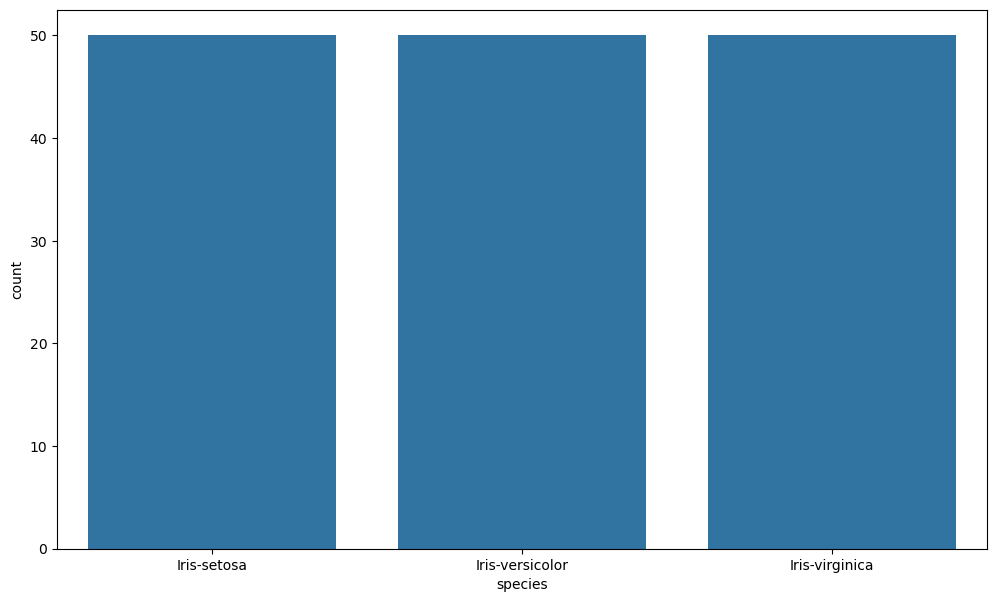

In [34]:
plt.figure(figsize=(12,7))
sns.countplot(data=iris,x='species')

# Splitting Our Data Into Training And Testing

In [6]:
X = iris.drop('species',axis=1)
Y = iris['species']

In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()

In [22]:
min_max_scaler.fit(X)

MinMaxScaler()

In [25]:
X_scaled = min_max_scaler.transform(X)

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

# Appplying KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

In [36]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# X_test.iloc[0]

# Making Predictions

In [37]:
predictions = knn_model.predict(X_test)

# Checking Performance Of The Model

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [40]:
print(confusion_matrix(predictions,Y_test))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


In [41]:
Y_test.iloc[0]

'Iris-setosa'

In [42]:
prediction = knn_model.predict(X_test)

In [43]:
prediction

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [50]:
np.mean(prediction!=Y_test)

0.0

# Elbow Method For Best K Value

In [58]:
error = []

for k in range(1,20):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train,Y_train)
  predictions = knn_model.predict(X_test)
  e = np.mean(predictions != Y_test)
  error.append(e)
     

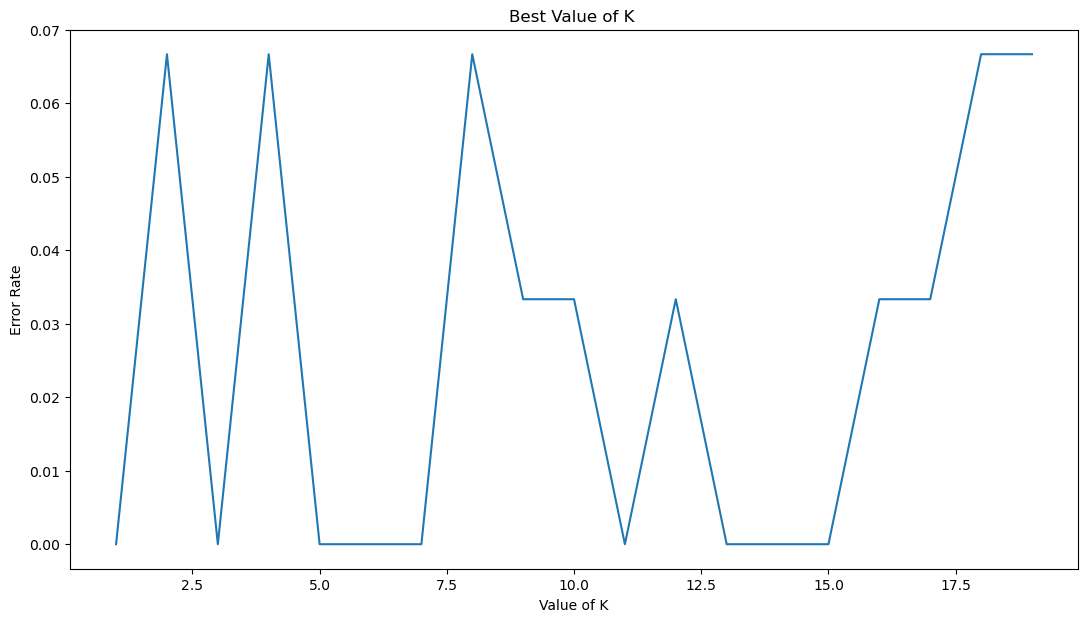

In [59]:
plt.figure(figsize=(13,7))
plt.plot(range(1,20),error)
plt.title('Best Value of K ')
plt.xlabel('Value of K')
plt.ylabel('Error Rate')
plt.show()